# Review

## [Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv( 'https://archive.ics.uci.edu/ml/''machine-learning-databases''/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
# Let's check the dataframe

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# note that the target variable is the first column

In [6]:
df.loc[:, 1].value_counts()

B    357
M    212
Name: 1, dtype: int64

__Problem__

- For a given Patience data can we predict whether this mass is Beigning oir Malignent?

__Goal__

1. Creating a model 5% better than historical accuracy score

or

2. Creating a model with best recall score

or

3. Creating a model with best precision score

In [7]:
## Dummy Model Accuracy Rate (Baseline)

357/(357 + 212)

0.6274165202108963

In [8]:
# How many 'M''s and 'B''s?

In [9]:
# How is the ratio of 'B' and 'M'

print("The ratio of B's is :", 357/(357 + 212))

The ratio of B's is : 0.6274165202108963


In [10]:
# Convert target variables into numerical data

In [11]:
from sklearn.preprocessing import LabelEncoder

Using sklearn modules allows us to __fit__ the transformations only on `training data` and only transform the `test_data`.

In [12]:
le = LabelEncoder()

In [13]:
le.fit(df.loc[:, 1])

LabelEncoder()

In [14]:
y = le.transform(df.loc[:,1])

In [15]:
X = df.loc[:, 2:]

In [16]:
X.head(2)

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [17]:
# Missing Values?

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

## EDA

## Data Cleaning

## Data Preparation

__Splitting Data__

In [19]:
## use train-test split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101320202, stratify = y )

In [21]:
X_train.shape

(455, 30)

In [22]:
X_test.shape

(114, 30)

In [23]:
import numpy as np

In [24]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([285, 170]))

__Data Leakage Example__

In [25]:
data = np.array([1, 5, 2, 3, 8])

In [26]:
mean = data.mean()

In [27]:
std = data.std()

In [28]:
scaled_data = (data - mean)/std

In [29]:
scaled_data

array([-1.12815215,  0.48349378, -0.72524067, -0.32232919,  1.69222822])

__Correct Way of Scaling Data__

In [30]:
data_train = np.array([1,2,3])


## future data 
data_test = np.array([5, 8])

In [31]:
training_mean = data_train.mean()
training_std = data_train.std()

training_scaled = (data_train -  training_mean)/training_std

In [32]:
training_scaled

array([-1.22474487,  0.        ,  1.22474487])

In [33]:
test_scaled = (data_test - training_mean)/training_std

In [34]:
test_scaled

array([3.67423461, 7.34846923])

__Scaling data__

In [35]:
## Standard scale data

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [37]:
std_scaler.fit(X_train) ## training_mean and std calculated
X_train_scaled = std_scaler.transform(X_train) ## only use training mean and std


## Never fit onto Test data!! Only Transform
X_test_scaled  = std_scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-1.53322162, -0.85311122, -1.48855726, ..., -0.15356378,
         0.0437359 ,  0.97434563],
       [ 0.75027919,  0.46905174,  0.77505065, ...,  1.4163528 ,
         1.21081687,  0.63365117],
       [ 3.85392681,  1.63398452,  3.98907295, ...,  2.21257843,
        -0.44042433, -0.56777468],
       ...,
       [-0.28715177, -0.02407931, -0.3697097 , ..., -1.56408499,
        -0.78358351, -1.20756064],
       [-0.66466137, -1.28430311, -0.71953242, ..., -0.48557484,
         0.34102727, -0.98324201],
       [ 2.29489862,  0.59293008,  2.32981827, ...,  1.92263211,
        -0.27054355,  0.07707111]])

__Creating New Features__

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_features = PolynomialFeatures(degree= 2, interaction_only= True)

In [41]:
poly_features.fit(X_train_scaled)


PolynomialFeatures(interaction_only=True)

In [42]:
poly_trained_scaled = poly_features.transform(X_train_scaled)

In [43]:
poly_trained_scaled.shape

(455, 466)

In [44]:
poly_test_scaled = poly_features.transform(X_test_scaled)

In [45]:
poly_test_scaled.shape

(114, 466)

## Modeling

### Logistic Regression

__With No regularization__ (Vanilla Log Reg)

In [46]:
## import Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
## instantiate LR with no penalty

In [49]:
lr = LogisticRegression(penalty = 'none')

In [50]:
## fit model

In [51]:
lr.fit(X_train_scaled, y_train) ## learned the coefficients

LogisticRegression(penalty='none')

In [52]:
y_pred = lr.predict(X_train_scaled)

In [53]:
score = lr.score(X_train_scaled, y_train)
score ## accuracy

1.0

In [54]:
## from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
## create a confusion matrix

In [57]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[285,   0],
       [  0, 170]])

In [58]:
## visualize confusion matrix with utils.py plot_confusion_matrix

In [59]:
import utils

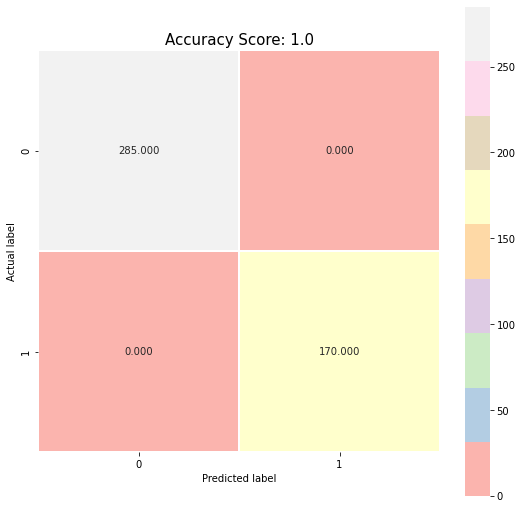

In [60]:
utils.plot_confusion_matrix(cm,score )

In [61]:
lr.score(X_test_scaled, y_test)

0.956140350877193

__Validation__

In [62]:
## import -- from sklearn.model_selection import cross_validate

In [63]:
from sklearn.model_selection import cross_validate

In [64]:
## call cross-validate with return_train_score, return estimator, cv =5

In [65]:
lr = LogisticRegression(penalty = 'none')

In [66]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [67]:
## investigate cv results

In [68]:
cv_fivefold['test_score']

array([0.98901099, 0.95604396, 0.97802198, 0.97802198, 0.92307692])

In [69]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

In [70]:
## Print results and keep them somewhere

In [71]:
print('Vanilla Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Vanilla Regression 5-fold cv results (Accuracy) 0.965 =/- 0.023


In [72]:
## note that we could use other scoring options in cross_validate

[Cross_validate - Scoring](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

In [73]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             scoring = 'recall',
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [74]:
cv_fivefold['test_score'] ## recall scores

array([0.97058824, 0.91176471, 0.94117647, 0.94117647, 0.97058824])

In [75]:
## note that sklearn has many other metric you can use

In [76]:
## from sklearn.metrics import recall_score, precision_score, roc_auc_score

### Logistic Regression with Regularization

In [77]:
## check the Logistic regression module again

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', max_iter= 1000)

__With regularization scaling is necessary__

In [80]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [81]:
y_pred = lr.predict(X_train_scaled)

In [82]:
confusion_matrix(y_train, y_pred)

array([[284,   1],
       [  4, 166]])

In [83]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [84]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Vanilla Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Vanilla Regression 5-fold cv results (Accuracy) 0.967 =/- 0.018


__Grid Search Validation__

In [85]:
## import GridSerachCV from sklearn.model_selection

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
## prepare a grid with 'C' and 'penalty'

In [88]:
grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [89]:
lr = LogisticRegression(solver = 'saga', max_iter= 10000)

In [90]:
## instantiate the gridsearch

In [91]:
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, cv =5, return_train_score= True, verbose= 2)

In [92]:
## fit grid search

In [93]:
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.2s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=2)

In [94]:
## check gridsearch cv_results_

## we can make them a dataframe also

In [95]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.0274631 , 0.00597587, 0.21828723, 0.01182823, 0.39726391,
        0.05580611, 0.43871622, 0.2146462 , 0.59617057, 0.41154237]),
 'std_fit_time': array([0.01156334, 0.00048348, 0.08192432, 0.00102208, 0.13035833,
        0.00538055, 0.04955793, 0.00738761, 0.05409366, 0.03164377]),
 'mean_score_time': array([0.00037565, 0.00027623, 0.00032625, 0.00025954, 0.00037436,
        0.00028977, 0.00030146, 0.00032783, 0.00030389, 0.00029874]),
 'std_score_time': array([5.68810170e-05, 1.93443144e-05, 1.54325899e-05, 3.57244922e-05,
        1.29016345e-04, 2.08468930e-05, 5.26165551e-06, 6.59117638e-05,
        1.94375343e-05, 6.13991493e-06]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1'

In [96]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,7,3,4,6,8,9,5,2,1,0
mean_fit_time,0.214646,0.0118282,0.397264,0.438716,0.596171,0.411542,0.0558061,0.218287,0.00597587,0.0274631
std_fit_time,0.00738761,0.00102208,0.130358,0.0495579,0.0540937,0.0316438,0.00538055,0.0819243,0.00048348,0.0115633
mean_score_time,0.000327826,0.000259542,0.000374365,0.000301456,0.000303888,0.000298738,0.000289774,0.000326252,0.000276232,0.000375652
std_score_time,6.59118e-05,3.57245e-05,0.000129016,5.26166e-06,1.94375e-05,6.13991e-06,2.08469e-05,1.54326e-05,1.93443e-05,5.6881e-05
param_C,10,0.1,1,10,100,100,1,0.1,0.01,0.01
param_penalty,l2,l2,l1,l1,l1,l2,l2,l1,l2,l1
params,"{'C': 10, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}"
split0_test_score,1,0.967033,0.989011,1,0.989011,0.989011,0.978022,0.956044,0.934066,0.747253
split1_test_score,0.956044,0.956044,0.945055,0.945055,0.945055,0.945055,0.967033,0.956044,0.945055,0.824176
split2_test_score,0.978022,0.989011,0.978022,0.978022,0.978022,0.978022,0.967033,0.989011,0.956044,0.791209


In [97]:
## print best parameters

In [98]:
## cross_validate the best estimator_

In [99]:
lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'saga', max_iter= 10000)

In [100]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [101]:
cv_fivefold['test_score']

array([0.96703297, 0.95604396, 0.98901099, 0.96703297, 0.97802198])

In [102]:
## pretty print test scores

In [103]:
## fit best regularization logreg and plot the confusion matrix

In [104]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Regularized Log Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Regularized Log Regression 5-fold cv results (Accuracy) 0.971 =/- 0.011


# Tree Based Models

## Decision Trees

In [105]:
## import decisiontree classifier

In [106]:
## instantiate

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train)


1.0

In [109]:
## cross_validate

In [110]:
cv_fivefold = cross_validate(estimator= dt_clf, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [111]:
cv_fivefold['test_score']

array([0.92307692, 0.92307692, 0.92307692, 0.94505495, 0.91208791])

In [112]:
cv_fivefold['train_score']

array([1., 1., 1., 1., 1.])

__Overfitting__

In [113]:
## confusion matrix plot

## Random Forests

### Bootstrapping

<img src= "images/bootstrap1.png" style="height:450px">


### Bagging: Bootstrap Aggregation


__Core idea__

- Decision trees have high variance.

- We know averaging can reduce the variance. (Central Limit Theorem?)

- Why bootstrap though?

    - Averaging the same numbers yields the same number: [2,2,2,2]  --> avg: 2
    
    - You want each tree to learn a little bit differently so that averaging make sense.

__A little bit more details__


We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.

Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

[sklearn averages over probabilities not majority vote](https://scikit-learn.org/stable/modules/ensemble.html#forest)


__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.

Hint: Correlated trees

- Random forests adds some randomness into the procedure to make each tree uncorrolated.

### Implementation of Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
X_train.shape

(455, 30)

In [116]:
np.log(30)

3.4011973816621555

In [117]:
rf = RandomForestClassifier(n_estimators= 700, max_features='auto', max_depth= 10)

In [118]:
cv_fivefold = cross_validate(estimator= rf, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


In [119]:
cv_fivefold['test_score']

array([0.95604396, 0.97802198, 0.97802198, 0.95604396, 0.96703297])

In [120]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Random Forest 5-fold cv results (Accuracy) 0.967 =/- 0.010


In [121]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
score = rf.score(X_train, y_train)
cm = confusion_matrix(y_train, y_pred)

In [ ]:
from matplotlib.pyplot 

In [122]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('logs/random_forest.png')
plt.draw()

NameError: name 'plt' is not defined

__Roc Curves__

In [ ]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

rf.fit(X_train, y_train)

rfc_disp = metrics.plot_roc_curve(rf, X_test, y_test)  # doctest: +SKIP
log_disp = metrics.plot_roc_curve(lr, X_test_scaled, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP
dct_disp = metrics.plot_roc_curve(dt_clf, X_test, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP

rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()  

## Best Model and Model Evaluation

In [ ]:
lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'saga', max_iter= 10000)

lr.fit(X_train_scaled, y_train)
score = lr.score(X_test_scaled, y_test)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
score

In [ ]:
utils.plot_confusion_matrix(cm, score)

### Extra Material 

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Do RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)